# Proyecto_02  

**Ingeniería de features, Modelos avanzados e Interpretación de modelos**

**PARTE A - Transformación de Datos**

Elige cuáles de las siguientes tareas son apropiadas para su dataset. Implementa las transformaciones que elegiste. Es importante que justifiques por qué las haces:

1.  Detección y eliminación de Outliers

2. Encoding

3. Imputación de valores faltantes

4. Escalado de datos

5. Generación de nuevas variables predictoras/reducción de dimensionalidad (SVD/PCA).

Vuelve a entrenar el modelo implementado en la Entrega 01 - en particular, el árbol de decisión - con este nuevo dataset transformado . Evalúa su desempeño a partir del dataset obtenido luego de transformar los datos. ¿Hay una mejora en su desempeño? Compara con el desempeño obtenido en el proyecto 01. Sea cual sea la respuesta, intenta explicar a qué se debe.

**PARTE B - Modelos Avanzados**

6. Elige dos de los modelos avanzados vistos Compara con el desempeño obtenido en el proyecto 01 (en el caso de regresión, considera una regresión lineal con atributos polinómicos y regularización). Entrénalos y evalúalos con sus argumentos por defecto. No te olvides de hacer un train/test split y usar Validación Cruzada.

7. Optimiza sus hiperparámetros mediante Validación Cruzada y Grid Search o Random Search.

8. Compara el desempeño de los nuevos modelos entre sí y con el modelo de la Parte A. ¿Cuál elegirías? Justifica.

**PARTE C - Interpretación de modelos**

De acuerdo a lo que el modelo permite, responde algunas o todas las siguientes preguntas:

9. ¿Qué variables fueron relevantes para el modelo para hacer una predicción? ¿Cuáles no? Si usaste una regresión lineal con regularización, presta atención a los parámetros (pendientes) obtenidas. Si usaste un modelo de ensamble en árboles, además de ver la importancia de cada atributo, también elige algunos árboles al azar y observa qué atributos considera importantes. ¿En qué se diferencian esos árboles? ¿Por qué? Finalmente, responde, ¿coincide con lo que esperabas a partir de tu experiencia con este dataset?

10. ¿Cómo es la distribución de errores (regresión) o qué clases se confunden entre sí (clasificación)? ¿Dónde falla? ¿A qué se debe?

## Descripcion de datos ##

In [1]:
# Importamos las librerias necesarias 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#Cargamos el dataset
df= pd.read_csv('DS_Proyecto_01_Datos_Properati.csv') 
df.shape

(146660, 19)

**FILTRAMOS DATASET**

- Partimos filtrando las propiedades de Capital Federal, se tomaran los tipos de propiedad de Departamento, Casa y PH. Se tomaran las propiedades que tengan como superfice mayor o igual a 1000 m2, pero tambien aquellas que tengan 15 m2

In [3]:
df_2=df[df.property_type.isin(['Departamento','Casa','PH']) & df.l2.isin(['Capital Federal'])] 
df_3=df_2[['l3','rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price','property_type']]  
df_3.shape

(91485, 8)

In [4]:
df_4=df_3[(df_3.surface_total>= 15) & (df_3.surface_total <= 1000)]  
#Filtramos el dataset para propiedades menores a 4000000 de dolares 
df_5=df_4[(df_4.price <= 4000000)] 
df_5.shape

(82373, 8)

- En el trabajo anterior habia una incosistencia en el dataset, que podira haber ocurrido por cargar mal los datos. Esta inconsistecia era que aveces la superficie total era menor que la cubierta. Se procedio a eliminar dicha caracteristica. 

In [5]:
df_6=df_5[df_5.surface_total > df_5.surface_covered] 
df_6.head()

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
1,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH
3,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH
8,Parque Patricios,1.0,1.0,1.0,45.0,37.0,89000.0,PH
9,Parque Patricios,1.0,1.0,1.0,45.0,37.0,89000.0,PH
10,Villa Pueyrredón,2.0,1.0,2.0,66.0,49.0,170000.0,PH


# Parte A: Transformacion de Datos #

## 1. Deteccion y eliminacion de outliers ## 

- Observamos los estadisticos del dataset 

In [6]:
df_6.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,56529.000000,56529.000000,56003.000000,56529.000000,56529.000000,5.652900e+04
mean,3.028534,2.020733,1.595200,100.516124,81.433937,2.667784e+05
std,1.259446,1.013353,0.859586,79.660446,57.607406,2.778165e+05
min,1.000000,0.000000,1.000000,16.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,53.000000,46.000000,1.370000e+05
50%,3.000000,2.000000,1.000000,75.000000,64.000000,1.900000e+05
75%,4.000000,3.000000,2.000000,116.000000,95.000000,2.900000e+05
max,26.000000,15.000000,12.000000,1000.000000,891.000000,4.000000e+06


- Ahora observamos los valores atipicos para:  

- **Superficie Total**

<AxesSubplot:xlabel='property_type', ylabel='surface_total'>

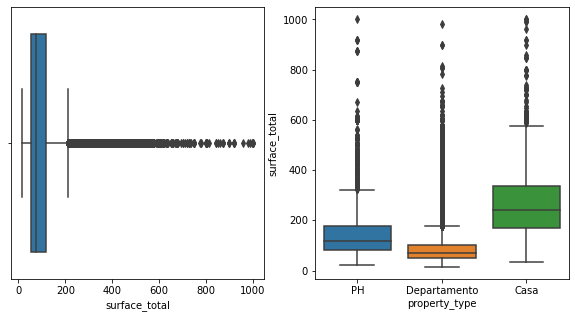

In [7]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(x='surface_total', data=df_6) 
plt.subplot(1,2,2) 
sns.boxplot(x='property_type',y='surface_total', data=df_6)


- **Precio**

<AxesSubplot:xlabel='property_type', ylabel='price'>

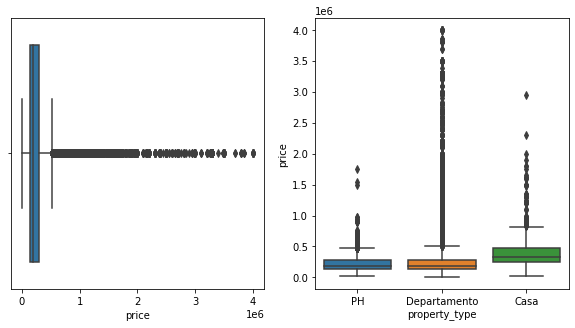

In [8]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(x='price', data=df_6)
plt.subplot(1,2,2)
sns.boxplot(x='property_type',y='price',data=df_6)


**Procedemos a eliminar los outliers :**

In [9]:
def elimino_valores_atipicos(df_6):
    Q1=df_6.quantile(0.25)
    Q3=df_6.quantile(0.75)
    IQR=Q3-Q1

    df_filtrado= df_6[~((df_6 < (Q1 - 1.5 * IQR)) |(df_6 > (Q3 + 1.5 * IQR))).any(axis=1)]

    return df_filtrado

In [10]:
df_7=elimino_valores_atipicos(df_6)

- Observamos los datos sin outliers:

- **Superficie total**

<AxesSubplot:xlabel='property_type', ylabel='surface_total'>

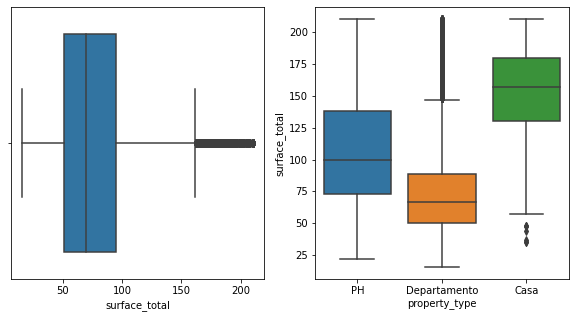

In [11]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(x='surface_total', data=df_7) 
plt.subplot(1,2,2) 
sns.boxplot(x='property_type',y='surface_total', data=df_7)


- **Precio**

<AxesSubplot:xlabel='property_type', ylabel='price'>

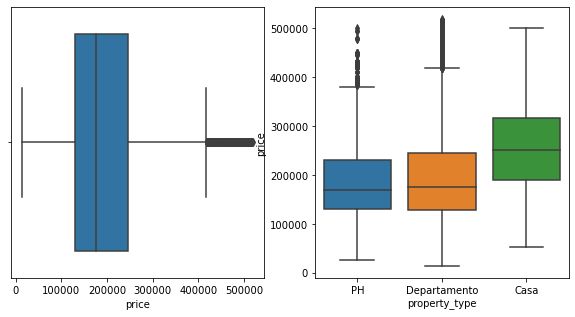

In [12]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(x='price', data=df_7)
plt.subplot(1,2,2)
sns.boxplot(x='property_type',y='price',data=df_7)


- Observamos los estadisticos luego de eliminar los outliers. Ahora podremos trabajar con valores mas comodos

In [13]:
df_7.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,49076.000000,49076.000000,48614.000000,49076.000000,49076.000000,49076.000000
mean,2.774452,1.823233,1.392500,78.017096,65.104043,197432.397649
std,0.996565,0.835942,0.589643,35.985478,27.656807,91587.617516
min,1.000000,0.000000,1.000000,16.000000,2.000000,14000.000000
25%,2.000000,1.000000,1.000000,51.000000,44.000000,130000.000000
50%,3.000000,2.000000,1.000000,70.000000,60.000000,175000.000000
75%,3.000000,2.000000,2.000000,95.000000,80.000000,245000.000000
max,7.000000,6.000000,3.000000,210.000000,168.000000,519000.000000


## 2. Imputacion de valores faltantes ##

- Se observan la cantidad de valores faltantes: 

In [14]:
df_7.isnull().sum()

l3                   0
rooms                0
bedrooms             0
bathrooms          462
surface_total        0
surface_covered      0
price                0
property_type        0
dtype: int64

Se observa que el features que tiene valores faltantes son los baños, por lo que procederemos a imputar dichos valores faltantes

- Se imputaran los valores faltantes con los valores mas frecuentes observados en las otras variables. Para calcular la moda, importaremos un modulo estadisticao denominado "statics"

In [15]:
#Importamos el modulos estadisco
import statistics as stats

In [16]:
moda=stats.mode(df_7.bathrooms)
moda

1.0

In [17]:
#Llenamos los valores NaN atravez de la funcion 'fillna' con la moda, calculado con el modulo stats.mode
df_7.fillna(moda, inplace= True)
#Observamos que ya no quedan valores faltantes 
df_7.isna().sum()

C:\Users\MI PC\miniconda3\envs\datascience\lib\site-packages\pandas\core\frame.py:4323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


l3                 0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
property_type      0
dtype: int64

In [18]:
df_8=df_7

## 3. Encoiding ## 

In [19]:
df_enc=pd.get_dummies(df_8,columns=['property_type','l3'])
df_enc.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type_Casa,property_type_Departamento,property_type_PH,l3_Abasto,...,l3_Villa Lugano,l3_Villa Luro,l3_Villa Ortuzar,l3_Villa Pueyrredón,l3_Villa Real,l3_Villa Riachuelo,l3_Villa Santa Rita,l3_Villa Soldati,l3_Villa Urquiza,l3_Villa del Parque
1,2.0,1.0,2.0,70.0,58.0,159000.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,1.0,1.0,85.0,50.0,295000.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8,1.0,1.0,1.0,45.0,37.0,89000.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,1.0,1.0,1.0,45.0,37.0,89000.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
10,2.0,1.0,2.0,66.0,49.0,170000.0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


## 4. Escaladas de datos ## 

Los valores de este dataset tienen diferentes tipos de unidades de media (dolares,m2,etc), por lo que corresponderia hacer una estandarizacion de las variables que permita llevar a todos las caracteristicas a una misma medida que no afecten el modelo a la hora de realizar el train y la prediccion

In [20]:
from sklearn.model_selection import train_test_split 

In [21]:
X=df_enc.drop('price',axis=1)
y=df_enc.price 

In [22]:
#Separamos los datos en train y test
X_train, X_test, y_train, y_test= train_test_split( X,y, test_size=0.3, random_state=42)

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
#Normalizamos los datos
sc=StandardScaler()
X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.transform(X_test)

## 5. Reduccion de dimensionalidad ##

### PCA ###

In [25]:
from sklearn.decomposition import PCA 

In [26]:
df_enc.shape

(49076, 66)

In [27]:
# Creamos el objeto PCA y aplicamos
pca=PCA(n_components=60)
X_train_pca=pca.fit_transform(X_train_sc)#Convertimos nuestros datos con las nuevas dimensiones de PCA
X_test_pca=pca.transform(X_test_sc)

In [28]:
print('Shape para PCA train:',X_train_pca.shape)
print('Shape para PCA test:',X_test_pca.shape)

Shape para PCA train: (34353, 60)
Shape para PCA test: (14723, 60)


In [29]:
pca.components_

array([[ 0.44189359,  0.43693313,  0.32091383, ...,  0.00904691,
        -0.02757864,  0.00350614],
       [-0.11739128, -0.12944312, -0.22274068, ...,  0.01796923,
         0.05781961,  0.07680424],
       [-0.02907238, -0.03755139,  0.0360477 , ..., -0.00953004,
        -0.05068718, -0.02279744],
       ...,
       [-0.02752573, -0.02614389, -0.02475074, ...,  0.02034245,
         0.05752837,  0.23821919],
       [ 0.06725017,  0.086351  ,  0.11191431, ...,  0.03562528,
         0.0697294 ,  0.11504398],
       [-0.33297609, -0.32472278,  0.82150665, ...,  0.04357845,
        -0.06175006,  0.03204013]])

- Vemos que con 10 componentes tenemos algo mas del 22% de la varianza explicada 

In [30]:
expl=pca.explained_variance_ratio_
print(expl)
print()
print('Suma', sum(expl[0:60]))

[0.06314145 0.032634   0.01776143 0.01715204 0.01700014 0.01666596
 0.01656127 0.01631995 0.01612702 0.0160425  0.01594961 0.0158483
 0.01580884 0.01573235 0.01570563 0.01566406 0.01564589 0.01563427
 0.01560091 0.01557373 0.01556342 0.01555552 0.01555071 0.01554285
 0.01553625 0.01553352 0.01552162 0.01551974 0.01551356 0.01551042
 0.01550613 0.01549727 0.01549346 0.01549223 0.01548511 0.0154836
 0.01547302 0.01547063 0.015464   0.01546169 0.01545884 0.01545266
 0.01544763 0.01544693 0.01544297 0.01543758 0.01543509 0.01543094
 0.01542314 0.01542164 0.01541917 0.01541341 0.01540612 0.01540266
 0.01539619 0.01538519 0.01497033 0.01439539 0.0114141  0.00821733]

Suma 0.9925614145509616


<function matplotlib.pyplot.show>

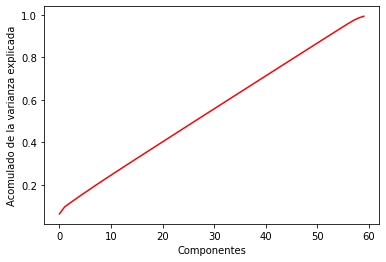

In [31]:
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'r')
plt.xlabel('Componentes')
plt.ylabel('Acomulado de la varianza explicada')
plt.show

Text(0, 0.5, 'X_nuevo[:,1]')

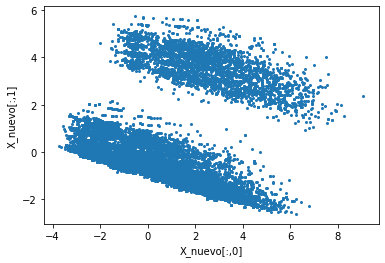

In [32]:
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], s=4)
plt.xlabel('X_nuevo[:,0]')
plt.ylabel('X_nuevo[:,1]')

## Evaluo el modelo luego de realizar PCA ##

Luego de aplicar una reduccion de dimensionalidad a nuestro modelo, lo evaluamos con un Arbol de decision

In [33]:
from sklearn.tree import DecisionTreeRegressor

In [34]:
#DT
tree_regressor= DecisionTreeRegressor(max_depth=10, random_state= 42)
#Entrenamos los modelos 
tree_regressor.fit(X_train_pca, y_train)

DecisionTreeRegressor(max_depth=10, random_state=42)

In [35]:
y_train_pred=tree_regressor.predict(X_train_pca)
y_test_pred=tree_regressor.predict(X_test_pca)

In [36]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_test_pred)

0.7979662048488236

## Comparamos con el modelo del primero proyecto ## 

- Se va a comparar lo obtenido en el primero proyecto. Las metricas que se va a evaluar seran las obtenidas por el r2 obtenido por la regresion linela y por RMSE obtenidos por ambos DT

Realizamos la division en train y test con el nuevo X generado por la reduccion de dimensionalidad PCA

In [37]:
from sklearn.tree import DecisionTreeRegressor

In [38]:
#DT
tree_regressor= DecisionTreeRegressor(max_depth=10, random_state= 42)
#Entrenamos los modelos 
tree_regressor.fit(X_train_sc, y_train)

DecisionTreeRegressor(max_depth=10, random_state=42)

In [39]:
from sklearn.tree import DecisionTreeRegressor

In [40]:
y_train_pred=tree_regressor.predict(X_train_sc)
y_test_pred=tree_regressor.predict(X_test_sc)

## R2 ## 

Calculamos le r2 del modelo de benchmark 

In [41]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_test_pred)

0.7527234210075527

## RMSE ##

Calculamos el error cuadratico medio 

In [42]:
from sklearn.metrics import mean_squared_error 
print('Error cuadratico medio de train:', mean_squared_error(y_train, y_train_pred, squared=False))
print()
print('Error cuadratico medio de test:', mean_squared_error(y_test,y_test_pred, squared= False))

Error cuadratico medio de train: 43258.85497986829

Error cuadratico medio de test: 45599.290495895875


## Comparamos lo obtenido en el primero y regundo proyecto ##

In [43]:
resumen =pd.DataFrame ({"Modelo":["DT proyecto 1", "DT proyecto 2"], 
           "Hiper-parámetros":["profundidad máxima = 10", "profundidad máxima = 10"], 
           "RMSE (test)":[ "151281", '45599'],"R2":["0.551","0.75"]})
pd.DataFrame(resumen)           

,Modelo,Hiper-parámetros,RMSE (test),R2
0,DT proyecto 1,profundidad máxima = 10,151281,0.551
1,DT proyecto 2,profundidad máxima = 10,45599,0.75


- Como se observa el RMSE del proyecto se ve ampliamente reducido con respecto al RMSE del proyecto 1. Lo que se observa una reduccion en termino de unidades de 108015 lo que representa una reduccion de casi el 70% del error . Tambien se observa una mejora del rendimiento del R2 del proyecto 2, lo que implica una mejora del 36% del rendimiento de esta metrica 

La reduccion del error ocurre ya que ahora, a las variables las optimizamos mejor antes de realizar el modelo. Este tipo de optimizamiento lo denominamos Preposesamiento de los datos donde se elimanron outliers y se agregaon valores faltates, que si bien este proceso agregar error al model permite un mejor rendimeinto del mismo. 
Una vez finalizado estos dos pasos se procede a realiar un Encoiding, para poder utilzar las variable categoricas que no se pudieron usar en el primer proyecto. Luego ser normalizo y se reducion a dos dimensiones a la variables del problema, lo que provoco un mejor rendiemiento del DT

In [44]:
#calculos auxiliares# 
r2_1=0.551 
r2_2=0.75 
a= ((r2_2-r2_1)/r2_1) 
print(a)

0.3611615245009073


In [45]:
#Calculos auxiliares II# 
MSE_1= 151281 
MSE_2=45599
a=MSE_1-MSE_2 
b=a/MSE_1 
print(a)
print()
print(b)

105682

0.6985807867478401


## Grafico comparacion de lo testeado y lo predicho del proyecto 01## 

Realizamos un grafico para observar el redimiento del DT despuesd el preprocesamiento de los datos, donde se pueden observar asintotas horizontales, lo que hacia que este modelo no se el ideal para este problema

C:\Users\MI PC\miniconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


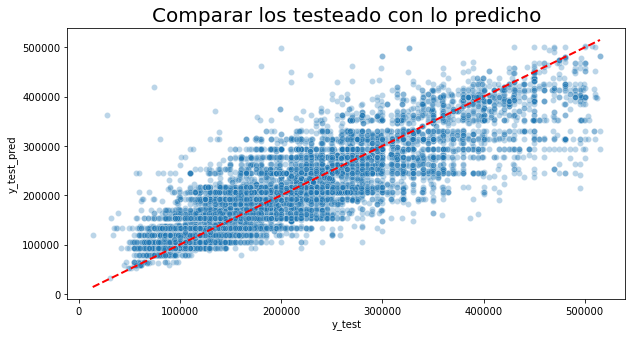

In [46]:
plt.figure(figsize=(10,5))
sns.scatterplot(y_test,y_test_pred,alpha=0.3)

plt.plot([y_test.min(), y_test.max()],
         [y_test.min(),y_test.max()], 
         'r--',linewidth=2)


plt.title('Comparar los testeado con lo predicho',fontsize=20)
plt.xlabel('y_test')
plt.ylabel('y_test_pred') 
plt.show()

- Comparamos la distribucion de datos de prueba con los testeados

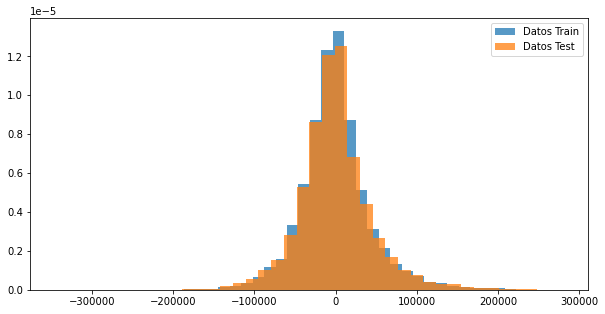

In [47]:
plt.figure(figsize=(10,5))
plt.hist(y_train-y_train_pred,density=1,alpha=0.75,bins=40,histtype='bar',label='Datos Train')
plt.hist(y_test-y_test_pred, density=1, alpha=0.75,bins=40,histtype='bar', label='Datos Test') 
plt.legend()


plt.show()

# B. Modelos avanzados #

Comenzamos a realizar los modelos avanzados. En este caso utilizaremos dos modelos de ensamble, Random Forest y XGBoost. 
Para realizar dichos modelos, no utilzare la reduccion de dimensionalidad por lo que utilizares el train y test utilizados a partin de la normalizacion. Para realizar estos modelos no se utilizara la reduccion de dimensionalidad PCA, para poder agilizar los procesos solo tomamos los datos normalizados. 

## Random Forest ## 

Para realizar el modelo de Random Forest debemos importarlo desde la libreria Sklearn

In [48]:
from sklearn.ensemble import RandomForestRegressor

In [49]:
regr=RandomForestRegressor()

In [50]:
#Entrenamos el modelo
regr.fit(X_train_sc,y_train)

RandomForestRegressor()

In [51]:
#Realizamos la prediccion
y_train_pred_2=regr.predict(X_train_sc)
y_test_pred_2=regr.predict(X_test_sc)

**Medimos el error, las metricas elegidas para medir el error son RMSE y el r2** 

In [52]:
print('Error cuadratico medio de train:', mean_squared_error(y_train, y_train_pred_2, squared=False))
print()
print('Error cuadratico medio de test:', mean_squared_error(y_test,y_test_pred_2, squared= False))

Error cuadratico medio de train: 16256.681114989742

Error cuadratico medio de test: 32479.414719255135


In [53]:
print('R2:',r2_score(y_test, y_test_pred_2))

R2: 0.8745463785856424


Se observa que para este modelo, el feature mas importantes es de la superficie cubierta. Algo que se podria deducir desde el primer modelo ya que eran el feature que mas correlacion tenia con el precio

## Grafico comparacion entre los predicho y los testeado ##

C:\Users\MI PC\miniconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


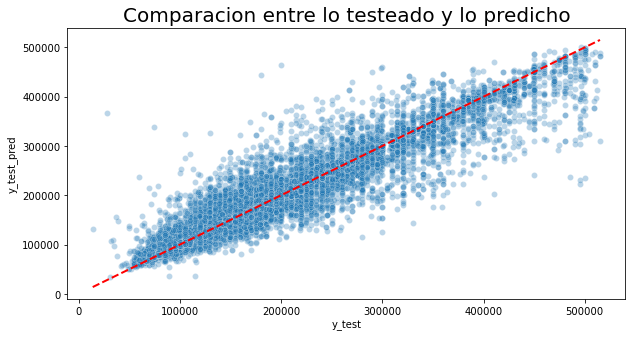

In [55]:
plt.figure(figsize=(10,5))
sns.scatterplot(y_test,y_test_pred_2,alpha=0.3)

plt.plot([y_test.min(), y_test.max()],
         [y_test.min(),y_test.max()], 
         'r--',linewidth=2)


plt.title('Comparacion entre lo testeado y lo predicho',fontsize=20)
plt.xlabel('y_test')
plt.ylabel('y_test_pred') 
plt.show()

C:\Users\MI PC\miniconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\MI PC\miniconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


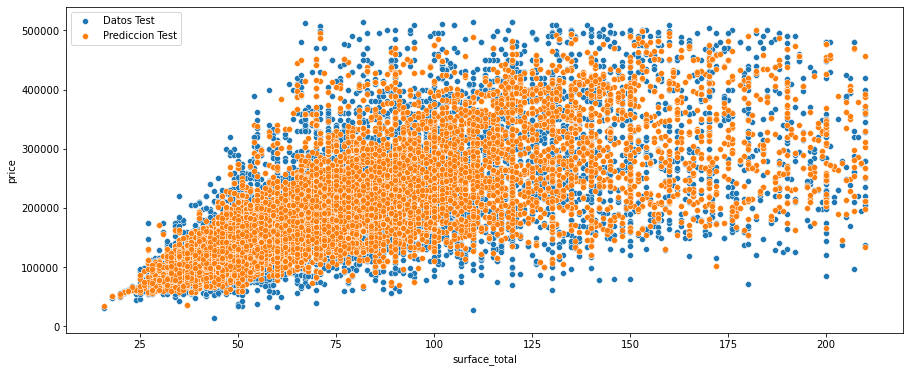

In [63]:
plt.figure(figsize = (15,6)) 
#sns.scatterplot(X_train.iloc[:,3],y_train, label = 'Datos Train')
#sns.scatterplot(X_train.iloc[:,3], y_train_pred_2, label = 'Prediccion Train') 

sns.scatterplot(X_test.iloc[:,3],y_test, label = 'Datos Test') 
sns.scatterplot(X_test.iloc[:,3], y_test_pred_2, label = 'Prediccion Test') 

plt.legend() 
plt.show()

## Validacion Cruzada ## 

A continuacion se realiza una validacion cruzada, para comprobar de mejor manera la presicion del modelo. Ya que no alcanza solo hacerlo con el train,test,split

**Analizamos el medoledo mediante la funcion croos_val_score** 

In [58]:
from sklearn.model_selection import cross_val_score
regr_score= cross_val_score(regr, X,y, cv=5) 

Vemos el resultado de 5 estimadores del error

In [59]:
print(regr_score)

[0.87484819 0.8793873  0.85496399 0.85740818 0.89782854]


**Realizamos un promedio y un desvio para el resultado de las 5 metricas dadas como resultado de la cv**

In [60]:
print('Promedio del score',regr_score.mean())
print('Desvio del score',regr_score.std()*2)

Promedio del score 0.8728872408807427
Desvio del score 0.031356132708719744


In [61]:
from sklearn.model_selection import cross_validate 

In [62]:
regr_score=cross_validate(regr, X,y, cv=5)

In [63]:
print(regr_score)

{'fit_time': array([ 97.82631421,  98.14538813,  93.58627152, 107.97660947,
       105.94624186]), 'score_time': array([1.06583118, 1.26228046, 1.10810232, 1.18409872, 1.35922384]), 'test_score': array([0.87501375, 0.87933396, 0.85575606, 0.85755757, 0.89775902])}


## Curva de validacion ##

In [82]:
scores_train = []
scores_test = []
N_estimadores = np.arange(1,50)
for n_estimadores in N_estimadores:
    regr=RandomForestRegressor(n_estimators=n_estimadores)
    regr.fit(X_train_sc, y_train)
    
    y_pred_train_regr_2 = regr.predict(X_train_sc)
    y_pred_test_regr_2 = regr.predict(X_test_sc)
    
    scores_train.append(r2_score(y_train, y_pred_train_regr_2))
    scores_test.append(r2_score(y_test, y_pred_test_regr_2))

scores_train = np.array(scores_train)
scores_test = np.array(scores_test)

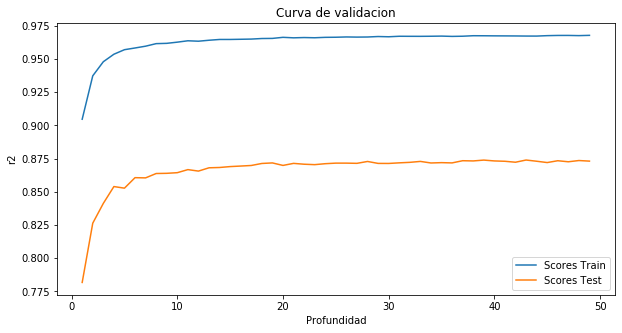

In [83]:
plt.figure(figsize=(10,5))
plt.plot(N_estimadores,scores_train, label = 'Scores Train')
plt.plot(N_estimadores,scores_test, label = 'Scores Test')
plt.title('Curva de validacion')
plt.legend()
plt.ylabel('r2')
plt.xlabel('Profundidad')
plt.show()

En la curva de validacion se observa que el modelo tiene mucha varianza, lo estaria provocando. Donde el error del test sera mayor al error al error del train. Por la tanto, antes de realizar el tuneo de hiperparametros podemos decir que este modelo no seria el ideal para predecir en este problema

## Optimizacion de hiper parametros ##

Se eligien esto hiperparametros a tuner ya que los mismos son los que mejor explican el modelo. Ademas se eligen estos por el costo computacional, ya que agregar otros hiperparametros demoraria mucho estre proceso

In [57]:
regr_op=RandomForestRegressor()

#Parametros de Grid para el RandomForestRegressor 
param_grid={ 
            'bootstrap':[True],
            'max_depth':[80,90,100,110], 
            'n_estimators':[10,20,30,40,50]
            }


In [58]:
from sklearn.model_selection import RandomizedSearchCV
CV= RandomizedSearchCV(regr_op,param_grid,cv=5) 
CV.fit(X_train_sc, y_train) 

print(CV.best_score_)
print(CV.best_params_)

0.8591272276530522
{'n_estimators': 40, 'max_depth': 100, 'bootstrap': True}


In [69]:
prediction=CV.predict(X_test_sc)

In [72]:
print('Error cuadratico medio de test:', mean_squared_error(y_test,prediction,squared=False))
print('R2:',r2_score(y_test, prediction))

Error cuadratico medio de test: 32735.39025143869
R2: 0.8725611456687092


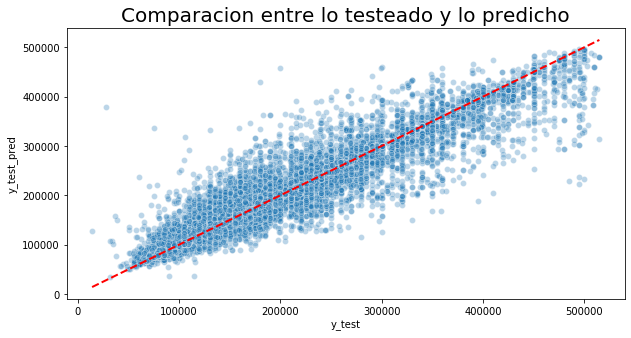

In [148]:
plt.figure(figsize=(10,5))
sns.scatterplot(y_test,prediction,alpha=0.3)

plt.plot([y_test.min(), y_test.max()],
         [y_test.min(),y_test.max()], 
         'r--',linewidth=2)


plt.title('Comparacion entre lo testeado y lo predicho',fontsize=20)
plt.xlabel('y_test')
plt.ylabel('y_test_pred') 
plt.show()

Luego de la optimizacion de hiperparametros con el metodo de radom search el modelo no mejora su rendiemiento, incluso empeora un poco. Por lo que este modelo no seria el ideal

## XG BOOST ## 

Realizamos otro modelo de esamble, es este caso el modelo elegido es el XGB. Para realizar este modelo tenemos que importar otra libreria, para la solucion de este problema necesitamos importar el XGBregressor

In [74]:
from xgboost import XGBRegressor

In [75]:
#Escribimos el modelo 
xgb_regr=XGBRegressor() 

xgb_regr.fit(X_train_sc,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [76]:
#Realizamos la prediccion 
y_train_pred_xgb=xgb_regr.predict(X_train_sc)
y_test_pred_xgb=xgb_regr.predict(X_test_sc)

**Calculamos el RMSE** 

In [77]:
print('Error cuadratico medio de train:', mean_squared_error(y_train, y_train_pred_xgb, squared=False))
print()
print('Error cuadratico medio de test:', mean_squared_error(y_test,y_test_pred_xgb, squared= False))

Error cuadratico medio de train: 33844.40148031941

Error cuadratico medio de test: 37335.265063743376


## Grafico comparando lo predicho y los testeados ## 

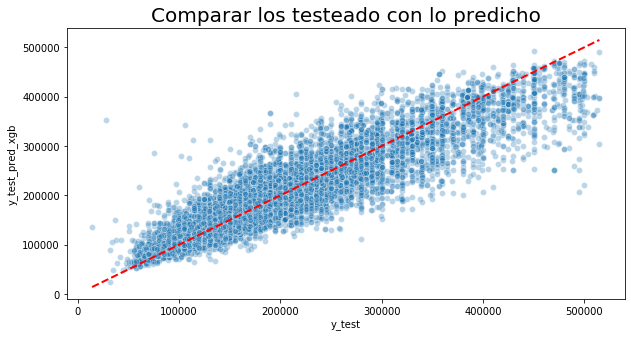

In [78]:
plt.figure(figsize=(10,5))
sns.scatterplot(y_test,y_test_pred_xgb,alpha=0.3)

plt.plot([y_test.min(), y_test.max()],
         [y_test.min(),y_test.max()], 
         'r--',linewidth=2)


plt.title('Comparar los testeado con lo predicho',fontsize=20)
plt.xlabel('y_test')
plt.ylabel('y_test_pred_xgb') 
plt.show()

## Validacion Cruzada ## 

A continuacion se realiza una validacion cruzada, para comprobar de mejor manera la presicion del modelo. Ya que no alcanza solo hacerlo con el train,test,split

**Analizamos el medoledo mediante la funcion croos_val_score** 

In [73]:
#Se elegien por defecto cv=5
xgb_score= cross_val_score(xgb_regr, X, y, cv=5,scoring='r2')#el modelo por defecto utiliza la metrica 'r2'.

Vemos el resultado de 5 estimadores del error

In [74]:
print(xgb_score)

[0.83386628 0.834467   0.82458171 0.82536016 0.84148101]


**Realizamos un promedio y un desvio para el resultado de las 5 metricas dadas como resultado de la cv**

In [75]:
promedio_score=xgb_score.mean()
desvio_score=xgb_score.std()*2
print('Promedio del score:', promedio_score)
print('Desvio del score', desvio_score)

Promedio del score: 0.8319512324796239
Desvio del score 0.012603654546785727


In [76]:
xgb_score_2=cross_validate(xgb_regr, X,y, cv=5)
print(xgb_score_2)

{'fit_time': array([15.48233438, 17.18638253, 15.22002459, 14.7545166 , 13.69260669]), 'score_time': array([0.14844871, 0.14048052, 0.12193131, 0.13692117, 0.10893917]), 'test_score': array([0.83386628, 0.834467  , 0.82458171, 0.82536016, 0.84148101])}


## Curva de validacion ##

In [80]:
scores_train = []
scores_test = []
N_estimadores = np.arange(1,50)
for n_estimadores in N_estimadores:
    xgb_regr=XGBRegressor(max_depth=n_estimadores)
    xgb_regr.fit(X_train_sc, y_train)
    
    y_pred_train_regr_3 = xgb_regr.predict(X_train_sc)
    y_pred_test_regr_3 = xgb_regr.predict(X_test_sc)
    
    scores_train.append(r2_score(y_train, y_pred_train_regr_3))
    scores_test.append(r2_score(y_test, y_pred_test_regr_3))

scores_train = np.array(scores_train)
scores_test = np.array(scores_test)

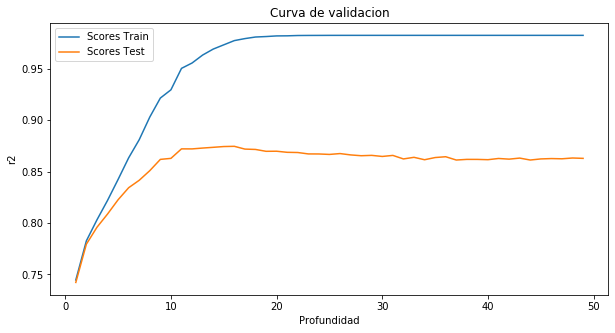

In [81]:
plt.figure(figsize=(10,5))
plt.plot(N_estimadores,scores_train, label = 'Scores Train')
plt.plot(N_estimadores,scores_test, label = 'Scores Test')
plt.title('Curva de validacion')
plt.legend()
plt.ylabel('r2')
plt.xlabel('Profundidad')
plt.show()

Como resultado se observa, que el modelo a partir del rango (~2,10), lo ideal de numero de profundida para el modelo de regresion de XGB. Ya que para valores mayores hay mucha difencia entre los entrenado y los testeado, lo que implica que para estos valores la varianza del modelo seria mucha lo que estariamos probocando overfiting en dicho modelo. 
Para valores menores de dicho rango estamos provocando que el sesgo sea alto, por lo cual probocariamos underfitting en nuestro modelo. 

## Optimizacion de hiperparametros XGB Regressor ##

Se eligien esto hiperparametros a tuner ya que los mismos son los que mejor explican el modelo. Ademas se eligen estos por el costo computacional, ya que agregar otros hiperparametros demoraria mucho estre proceso

In [79]:
xgb_op=XGBRegressor() 
param_grid_2={'learnig_rate':[0.01,0.1],
             'max_depth':[10,20,30,40,50],
             'n_estimators':[10,20,30,40,50]}

In [80]:
CV_2= RandomizedSearchCV(xgb_op,param_grid,cv=5) 
CV_2.fit(X_train_sc, y_train) 

print(CV.best_score_)
print(CV.best_params_)

[02:41:34] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { bootstrap } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[02:41:54] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { bootstrap } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[02:42:13] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { bootstrap } might not be used.

  This may not be accurate due to some parameters are only used in language bi

In [82]:
prediction_2=CV_2.predict(X_test_sc)

In [83]:
print('Error cuadratico medio de test:', mean_squared_error(y_test,prediction_2,squared=False))
print('R2:',r2_score(y_test, prediction_2))

Error cuadratico medio de test: 33909.98709422664
R2: 0.8632516603023911


En el caso de este modelo vemos que si mejora el error, por lo que seria un buen modelo para predicir en el caso de este problema 

## Comparacion de de los 3 modelos (RandomForest, XGBoost y DT anterior) ##

- A continucaion se compararan los 3 modelos despues del tuneo de hiperparametros de los modelos

Modelo: Decision Tree
RMSE: 45599.290495895875
R2: 0.7527234210075527


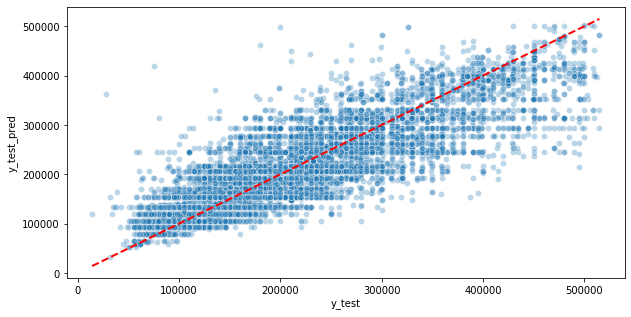

Modelo: Random Forest
RMSE: 32735.39025143869
R2: 0.8725611456687092


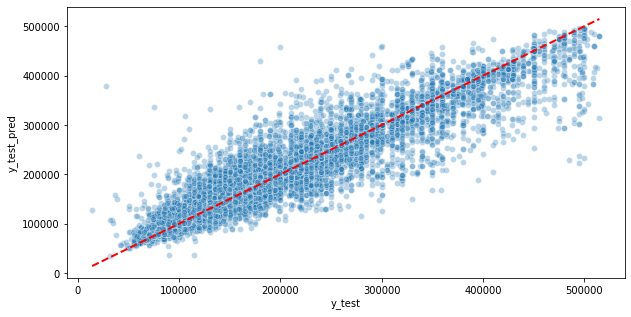

Modelo:XGBoost
RMSE: 33909.98709422664
RS: 0.8632516603023911


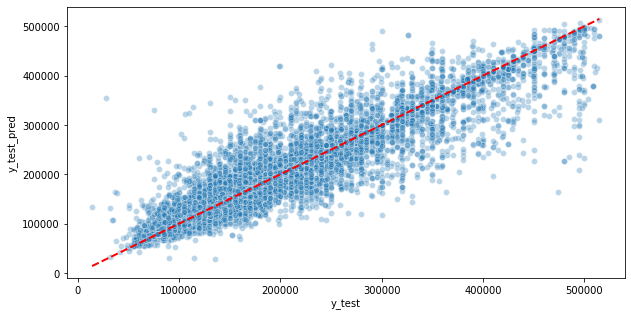

In [197]:
plt.figure(figsize=(10,5))
sns.scatterplot(y_test,y_test_pred,alpha=0.3)

plt.plot([y_test.min(), y_test.max()],
         [y_test.min(),y_test.max()], 
         'r--',linewidth=2)
print('Modelo: Decision Tree')
print('RMSE:',mean_squared_error(y_test, y_test_pred,squared=False))
print('R2:', r2_score(y_test, y_test_pred))

plt.xlabel('y_test')
plt.ylabel('y_test_pred') 
plt.show()



plt.figure(figsize=(10,5))
sns.scatterplot(y_test,prediction,alpha=0.3)

plt.plot([y_test.min(), y_test.max()],
         [y_test.min(),y_test.max()], 
         'r--',linewidth=2)
print('Modelo: Random Forest')
print('RMSE:', mean_squared_error(y_test,prediction, squared=False))
print('R2:', r2_score(y_test, prediction))

plt.xlabel('y_test')
plt.ylabel('y_test_pred') 
plt.show()

plt.figure(figsize=(10,5))
sns.scatterplot(y_test,prediction_2,alpha=0.3)

plt.plot([y_test.min(), y_test.max()],
         [y_test.min(),y_test.max()], 
         'r--',linewidth=2)

print('Modelo:XGBoost')
print('RMSE:', mean_squared_error(y_test, prediction_2, squared=False))
print('RS:', r2_score(y_test,prediction_2))

plt.xlabel('y_test')
plt.ylabel('y_test_pred')
plt.show()

En la comparacion de modelos vemos que el mejor modelo es el Random Forest, lo cual la logica seria elegirlo. Pero luego de la optimizacion este modelo no mejora el rendimiento del mismo, de hecho lo empeora un poco. Pero el motico principal por lo que no lo elegiria es porque en la cross validacion vemos que es un model que proca overfitting, por lo cual no es un modelo bueno para este problema. 
Si bien el modelo XGBoost incurre en mas error, este si mejora luego de la optimizacion del hiperparametros, ademos en la cross validation vemos que que existe un punto medio de erroe en lo predicho y lo testado antes de provocar overfittin o underfitting, por lo que es un mejor modelo para este problema. 
Con respecto al primer modelo vemo claramente que los modelos avanzados tienen un mejor rendimiento. 

## Parte C: Intrepetacion de modelos ##

### Error ###

Como critica al modelo Random Forest observamos que no es un buen predictor para este modelo, ya que el mismo a partir de un determinado rango de estimadores el mismo modelo esta sobreajustado, debido a como vimos en el curva de validacion el modelo incurre en mucha varianza. Y es estable, lo que quiere decir que por mas que se cambien los numeros de estimadores o profundidad el modelo esta sobreajustado. Quizas este modelo si bien arroja mejores resultado en cuanto al error, para este problema no seria el ideal. 
Con respecto a XGBoost, observamos que permite predicir mejor para este problema, ya que entre el error de lo entrenado y los testeado hay un punto minimo. Punto que seria el optimo para que el modelo no sobreajuste y no subajuste, pero si bien este modelo predice mejor para este problema, tendiramos que incurrir en una error mayor que el modelo Random Forest. 

### Variables ### 

Segun la experiencia con este dataset, las variables con mayor correlacion eran las de superficie total y la superficie cubierta. En modelo de PCA vimos que de un total de 66 variables en el modelo solo 60 explicaban casi toda la variacion del modelo. 
Para este problema segun vimos en la importancia de features del Random Forest, segui tomando como la variable mas importante a la Superficie total para predecir el precio

### Critica ### 

- En la parte de valores faltates, luego de realizar un filtrado del dataset, quedaron solo en variable de baños. Los valores faltantes son pocos, por lo que no veo la necesidad de incurrir en mas error por una cantidad relativamente chica de valores faltantes. Ademas teniendo en cuenta que esta variable no tenia mucha correlaion. 
- Con respecto al proyecto 1 ahora hay una mejora, no solo porque se eligieron modelos mas complejos, si no que ademas ahora se pudieron sumar variables cateogoricas como el barrio y el tipo de inmueble. Lo cual considero bueno, ya que esto habia sido una critica al modelo del proyecto anterior.
- Considero que esta segunda parte se podria haber profundizado en el EDA (lo cual no era requisito) ya que ahora sumabamos mas variables a nuesto modelo para predecir

Se entrenaron dos modelos, de los cuales uno si bien tiene menos error segun la cross validation no es un buen predictor para este problema y ademas despues de la optimizacion de hiperparametros el mismo empeora un poco. Por lo que decido quedarme con el modelo XGBoost, ya que el mismo luego de la optimizacion de hiperparametro mejora su rendimiento y en la croos validacion nos da que seria un buen modelo para usar en este problema. 